In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 6.0)
import tensorflow as tf
import importlib

## Prepare dataset

In [17]:
import utils, config
importlib.reload(utils)
importlib.reload(config)
from utils import load_captions
from config import *

In [2]:
X, Y, X_lens, vocab_size = load_captions(ms_coco_dir)

loading annotations into memory...
Done (t=1.95s)
creating index...
index created!
118287 591753 5.002688376575617
vocab size 310


## Train

In [3]:
# reload the module and reimport in case of change in code
import lstm_language_model
importlib.reload(lstm_language_model)
from lstm_language_model import RNNLanguageModel

In [4]:
tf.reset_default_graph()
sess = tf.Session()

model = RNNLanguageModel(embedding_size=embeding_size, learning_rate=learning_rate, lstm_size=lstm_size, num_steps=num_steps, vocab_size=vocab_size, sess=sess, checkpoint_path=checkpoint_path)
model.build()

sess.run(tf.global_variables_initializer())

In [5]:
n_epochs = 5

model.train(X, Y, X_lens, n_epochs, batch_size, save_every=100)

epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
training loss after 10 steps: 2.05555105209
Finished training
Saved final model to checkpoints/coco.ckp-final
Final training loss: 2.05555033684
It took 00h 00m 03s


In [173]:
sess.close()

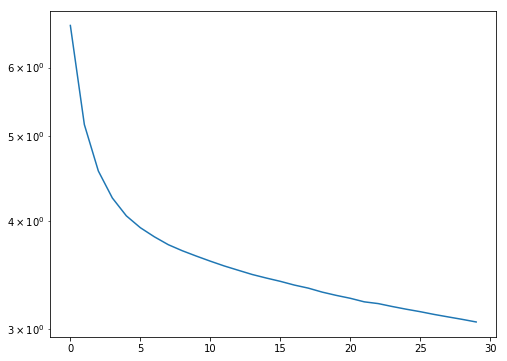

In [9]:
losses = np.load('losses.npy')
plt.semilogy(losses)

## Infer

In [10]:
# reload the module and reimport in case of change in code
import lstm_language_model
importlib.reload(lstm_language_model)
from lstm_language_model import RNNLanguageModel

In [11]:
import pickle
with open('vocab.pic', 'rb') as f:
    vocab = pickle.load(f)
id_word = [v[0] for v in vocab]
word_id = {w:i for i,w in enumerate(id_word)}
vocab_size = len(vocab)
vocab_size

16750

In [21]:
importlib.reload(config)
from config import *

tf.reset_default_graph()
sess = tf.Session()
model = RNNLanguageModel(embedding_size=embeding_size, learning_rate=learning_rate, lstm_size=lstm_size, num_steps=num_steps, vocab_size=vocab_size, sess=sess, checkpoint_path=checkpoint_path)
model.build(model_type='infer')
model.saver.restore(sess, 'from-server/' + checkpoint_path + '-1000')

INFO:tensorflow:Restoring parameters from from-server/checkpoints/coco.ckp-1000


In [22]:
seq = ['START']
seq = [word_id[s] for s in seq]
state = init_state = np.zeros((2, 1, lstm_size))

num_words = 500

for i in range(len(seq)-1, num_words):
    p, state = model.infer(np.reshape(seq[-1], (1,1)), np.array([1]), state)
#     max_id = np.argmax(p)
    p = p.reshape([-1])
    max_id = np.random.choice(list(range(len(p))), p=p)
    seq.append(max_id)
    print(id_word[max_id], end=' ')
    if max_id == word_id['END']: # restart the sentence
        print()
        seq.append(word_id['START'])
        state = init_state

A stack of industrial paint kitchen that looks like a curtain . END 
A man is flying through the air while riding a skateboard . END 
A traffic light and an air force jet aircraft over it flying as passengers through the woods END 
A kitchen table with a modern pantry rose . END 
Women boy making faces their leg by a blow out a Nintendo Wii . END 
A remote control that has been feels the word hand . END 
A photo of a pickup truck sitting in a wildlife park END 
A man and woman fly kites in the air while riding skis . END 
a person shavinfg a blow out of a car END 
a man is talking on a cell phone as he stands on a city street END 
The view from the boat with part of the bathtub . END 
A white table topped with a fork has an orchid on top of pillows . END 
The walls in the bathroom has a digital changing table . END 
A boy sheering a microphone on a skateboard . END 
People playing tennis on a tennis court playing frisbee . END 
Heart shaped pepperoni and muffins sits on a rainy day . E